In [ ]:
#############################################################################################################
##### Notebook Logica Fuzzy
##### Baseado em:
## Rizianiza, I., & Djafar, A. (2017, October). Design car braking system using mamdani fuzzy logic control. 
## In 2017 4th International Conference on Electric Vehicular Technology (ICEVT) (pp. 129-133). IEEE.
##
## OBJETIVO: Determinar a forca que deve ser aplicada ao freio de modo que o carro evite um choque.
##
##############################################################################################################
## Especificacao do problema:
##
##Entrada:
## Posicao relativa do carro
## Universo: 0 a 60 
## Conjunto Fuzzy: muito_perto, perto, medio, longe, muito_longe
##
##  Velocidade do carro
##  Universo: 0 a 100
##  Conjunto Fuzzy: muito_lento, lento, intermediaria, rapido, muito_rapido
##
## Saida:
##  Forca aplicada ao freia
##  Universo: 0 a 9263N
##  Conjunto Fuzzy: fraca, media, forte
##
## Regras de decisao:
##  Sao consideradas 25 regras de decisao.
###################################################################################################################

In [1]:
#!pip install networkx==2.3
#!pip install matplotlib-inline
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control
import matplotlib.pyplot as plt


In [2]:
# Criar as variaveis do problema
carPosition = control.Antecedent(np.arange(0, 61, 1), 'carPosition') #entrada
carVelocity = control.Antecedent(np.arange(0, 101, 1), 'carVelocity') # entrada
brakeForce = control.Consequent(np.arange(0,9264,1), 'brakeForce') # saida

In [3]:
# Criar variaveis linguisticas usando as funcoes de pertinencia

carPosition['muito_perto'] = fuzz.gauss2mf(carPosition.universe, -2.76, 10, 3.773, 3.86) #mean1, sigma1, mean2, sigma2
carPosition['perto'] = fuzz.gaussmf(carPosition.universe, 18.42, 4.21) #mean1, sigma1, mean2, sigma2
carPosition['medio'] = fuzz.gaussmf(carPosition.universe, 27.76, 3.96) #mean1, sigma1, mean2, sigma2
carPosition['longe'] = fuzz.gaussmf(carPosition.universe, 38, 3.54) #mean1, sigma1, mean2, sigma2
carPosition['muito_longe'] = fuzz.gauss2mf(carPosition.universe, 51, 3.46, 63.3, 5.1) #mean1, sigma1, mean2, sigma2

C:\Users\dealbuqc\AppData\Local\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


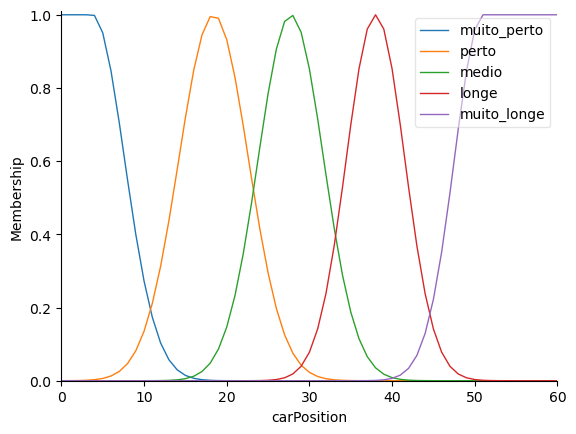

In [4]:
carPosition.view()


In [5]:
carVelocity['muito_lento'] = fuzz.gauss2mf(carVelocity.universe, -0.153, 10, 7.945, 4.02)
carVelocity['lento'] = fuzz.gaussmf(carVelocity.universe, 27.97, 6.6)
carVelocity['medio'] = fuzz.gaussmf(carVelocity.universe, 42.26, 11.3)
carVelocity['rapido'] = fuzz.gaussmf(carVelocity.universe, 53.6, 7.177)
carVelocity['muito_rapido'] = fuzz.gauss2mf(carVelocity.universe, 68.18, 4.04, 103.6, 6.48)

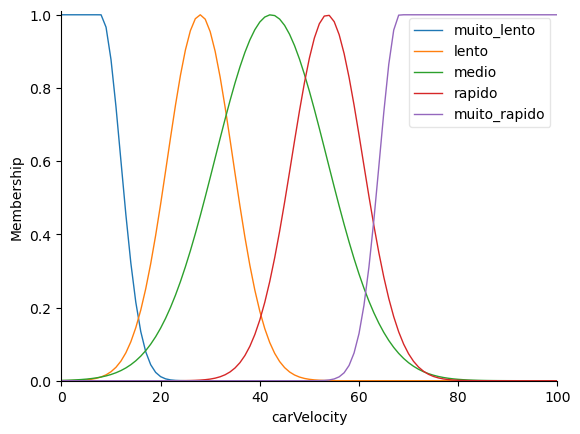

In [6]:
carVelocity.view()

In [7]:
brakeForce['fraca'] = fuzz.gaussmf(brakeForce.universe, 2530, 730.4)
brakeForce['media'] = fuzz.gaussmf(brakeForce.universe, 4760, 1325)
brakeForce['forte'] = fuzz.gaussmf(brakeForce.universe, 6120, 1090)

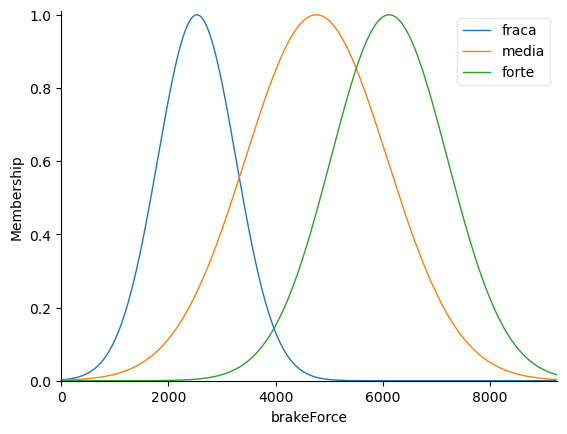

In [8]:
brakeForce.view()

In [10]:
# Criando as regras
rule01 = control.Rule(carPosition['muito_perto'] & carVelocity['muito_lento'], brakeForce['fraca'])
rule02 = control.Rule(carPosition['muito_perto'] & carVelocity['lento'], brakeForce['fraca'])
rule03 = control.Rule(carPosition['muito_perto'] & carVelocity['medio'], brakeForce['fraca'])
rule04 = control.Rule(carPosition['muito_perto'] & carVelocity['rapido'], brakeForce['media'])
rule05 = control.Rule(carPosition['muito_perto'] & carVelocity['muito_rapido'], brakeForce['media'])

rule06 = control.Rule(carPosition['perto'] & carVelocity['muito_lento'], brakeForce['fraca'])
rule07 = control.Rule(carPosition['perto'] & carVelocity['lento'], brakeForce['fraca'])
rule08 = control.Rule(carPosition['perto'] & carVelocity['medio'], brakeForce['fraca'])
rule09 = control.Rule(carPosition['perto'] & carVelocity['rapido'], brakeForce['media'])
rule10 = control.Rule(carPosition['perto'] & carVelocity['muito_rapido'], brakeForce['media'])

rule11 = control.Rule(carPosition['medio'] & carVelocity['muito_lento'], brakeForce['fraca'])
rule12 = control.Rule(carPosition['medio'] & carVelocity['lento'], brakeForce['fraca'])
rule13 = control.Rule(carPosition['medio'] & carVelocity['medio'], brakeForce['media'])
rule14 = control.Rule(carPosition['medio'] & carVelocity['rapido'], brakeForce['forte'])
rule15 = control.Rule(carPosition['medio'] & carVelocity['muito_rapido'], brakeForce['forte'])

rule16 = control.Rule(carPosition['longe'] & carVelocity['muito_lento'], brakeForce['media'])
rule17 = control.Rule(carPosition['longe'] & carVelocity['lento'], brakeForce['media'])
rule18 = control.Rule(carPosition['longe'] & carVelocity['medio'], brakeForce['media'])
rule19 = control.Rule(carPosition['longe'] & carVelocity['rapido'], brakeForce['media'])
rule20 = control.Rule(carPosition['longe'] & carVelocity['muito_rapido'], brakeForce['forte'])

rule21 = control.Rule(carPosition['muito_longe'] & carVelocity['muito_lento'], brakeForce['media'])
rule22 = control.Rule(carPosition['muito_longe'] & carVelocity['lento'], brakeForce['media'])
rule23= control.Rule(carPosition['muito_longe'] & carVelocity['medio'], brakeForce['forte'])
rule24 = control.Rule(carPosition['muito_longe'] & carVelocity['rapido'], brakeForce['forte'])
rule25 = control.Rule(carPosition['muito_longe'] & carVelocity['muito_rapido'], brakeForce['forte'])


In [11]:
brakesystem_ctrl = control.ControlSystem([rule01,rule02,rule03,rule04,rule05,rule06,rule07,rule08,rule09,rule10,
                                        rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                        rule21,rule22,rule23,rule24,rule25])
brakesystem_simulator = control.ControlSystemSimulation(brakesystem_ctrl)

In [12]:
carPos = 30
carVel = 50

brakesystem_simulator.input['carPosition'] = carPos
brakesystem_simulator.input['carVelocity'] = carVel
brakesystem_simulator.compute()

------ position ------
muito_perto 9.44434398799547e-11
perto 0.02275698397143974
medio 0.8521577002119142
longe 0.07780538461895413
muito_longe 1.0020922651179738e-08


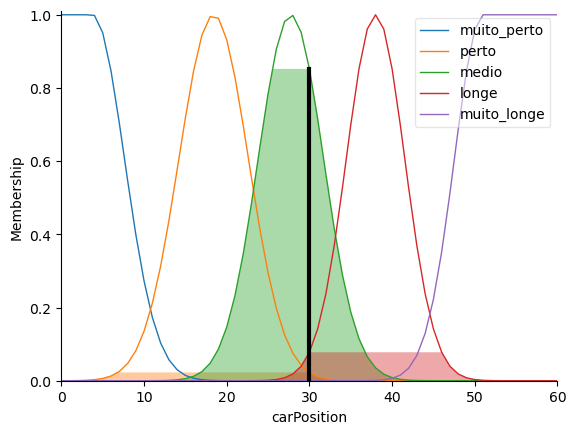

In [13]:
carPosition.view(sim=brakesystem_simulator)

print("------ position ------")
input = carPos
for t in carPosition.terms:
    mval = np.interp(input, carPosition.universe, carPosition[t].mf)
    print(t,mval)




------- velocity ------
muito_lento 1.0020922651179738e-08
lento 1.0020922651179738e-08
medio 1.0020922651179738e-08
rapido 1.0020922651179738e-08
muito_rapido 1.0020922651179738e-08


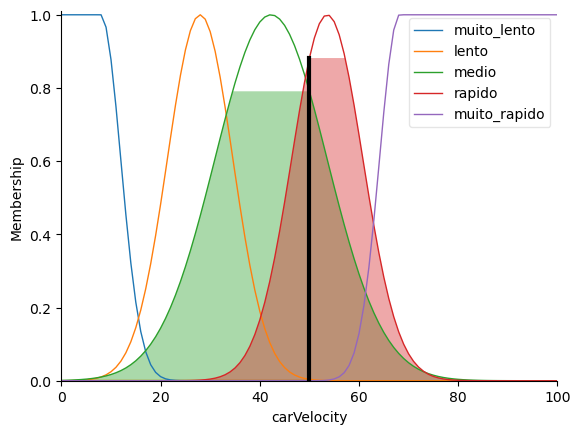

In [14]:
carVelocity.view(sim=brakesystem_simulator)

print("\n------- velocity ------")
input = carVel
for t in carVelocity.terms:
    eval = np.interp(input, carVelocity.universe, carVelocity[t].mf)
    print(t,mval)



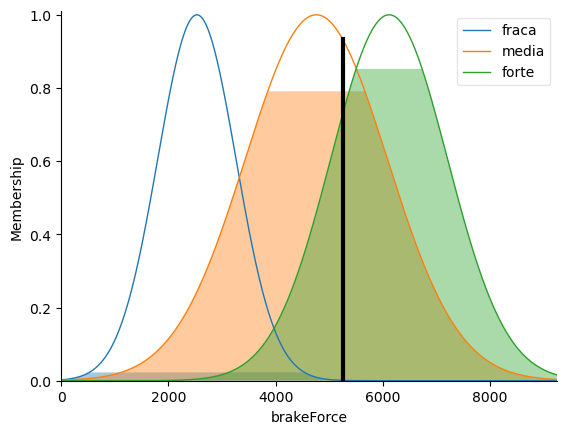

In [15]:
brakeForce.view(sim=brakesystem_simulator)

In [16]:
print(brakesystem_simulator.output['brakeForce'])

5251.813059939534
